In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
124,6.7,3.3,5.7,2.1,virginica
18,5.7,3.8,1.7,0.3,setosa
133,6.3,2.8,5.1,1.5,virginica
63,6.1,2.9,4.7,1.4,versicolor
12,4.8,3.0,1.4,0.1,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.species       

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [7]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
print(label_encoder.classes_)

['setosa' 'versicolor' 'virginica']


In [9]:
LookupFlowerName = dict(zip(df.species.unique(),label_encoder.classes_))

In [10]:
LookupFlowerName

{np.int64(0): 'setosa', np.int64(1): 'versicolor', np.int64(2): 'virginica'}

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
X=df[['sepal_length',	'sepal_width', 'petal_length', 'petal_width']]

In [13]:
y=df['species']

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 61 to 47
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  112 non-null    float64
 1   sepal_width   112 non-null    float64
 2   petal_length  112 non-null    float64
 3   petal_width   112 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


In [18]:
sns.set(style="whitegrid")

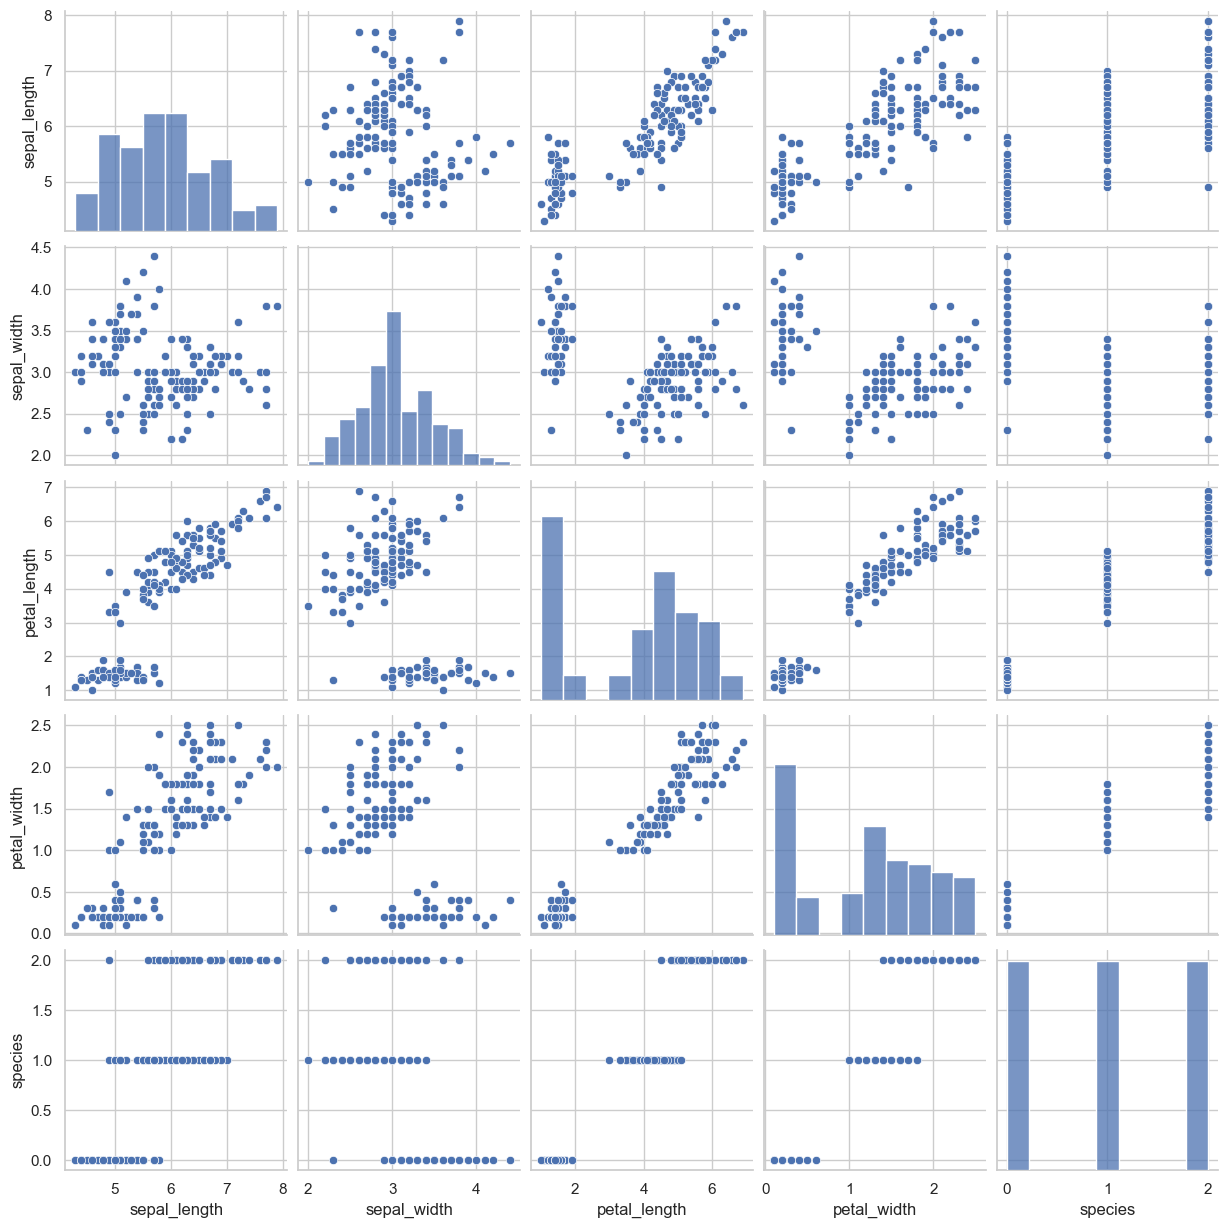

In [19]:
sns.pairplot(df,)

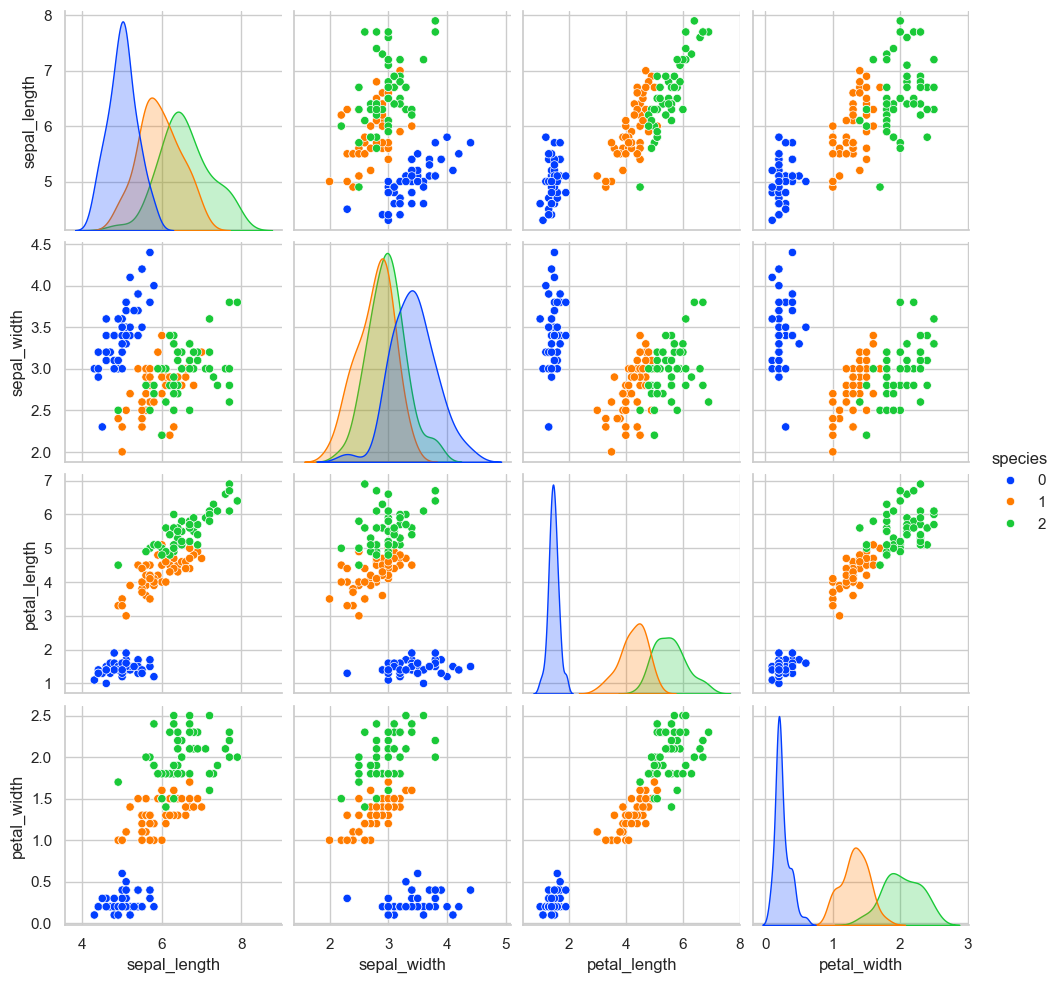

In [20]:
sns.pairplot(df, hue='species', palette='bright')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
neigh = KNeighborsClassifier()

In [23]:
model = neigh.fit(x_train, y_train)

In [24]:
neigh.score(x_train, y_train), neigh.score(x_test, y_test)

(0.9732142857142857, 0.9736842105263158)

In [25]:
preds = neigh.predict(x_test)

In [26]:
preds

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [27]:
example = [[5.1, 3.5, 1.4, 0.2],  # Iris-setosa
           [6.7, 3.1, 4.7, 1.5],  # Iris-versicolor
           [7.2, 3.6, 6.1, 2.5]]  # Iris-virginica

In [28]:
neigh.predict(example)

c:\Users\kamal\OneDrive\Desktop\KIIT\GAN\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 2])

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Text(47.25, 0.5, 'Truth')

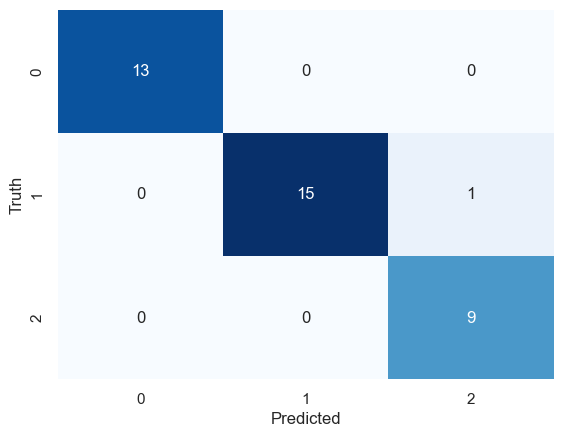

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, preds)
print(  cm)
sns.heatmap(cm, annot=True,cmap='Blues',fmt='d',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
# accuracy
(13+15+9)/(13+0+0+0+15+1+0+0+9)

0.9736842105263158

In [31]:
# for class 0
precision = 13/(13+0+0)
recall = 13/(13+0+0)
f1_score = 2*precision*recall/(precision+recall)
f1_score, precision, recall

(1.0, 1.0, 1.0)

In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



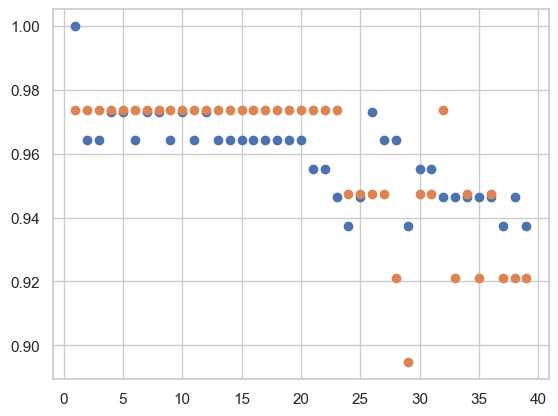

In [36]:
train_scores = []
test_scores = []
for i in range(1,40):
    neigh_ = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    neigh_.fit(x_train,y_train)
    train_scores.append(neigh_.score(x_train,y_train))
    test_scores.append(neigh_.score(x_test,y_test))
plt.scatter(range(1,40),train_scores,label='Train Score')
plt.scatter(range(1,40),test_scores,label='Test Score')

In [34]:
df.species.unique()

array([0, 1, 2])

In [35]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64